# **TITLE**

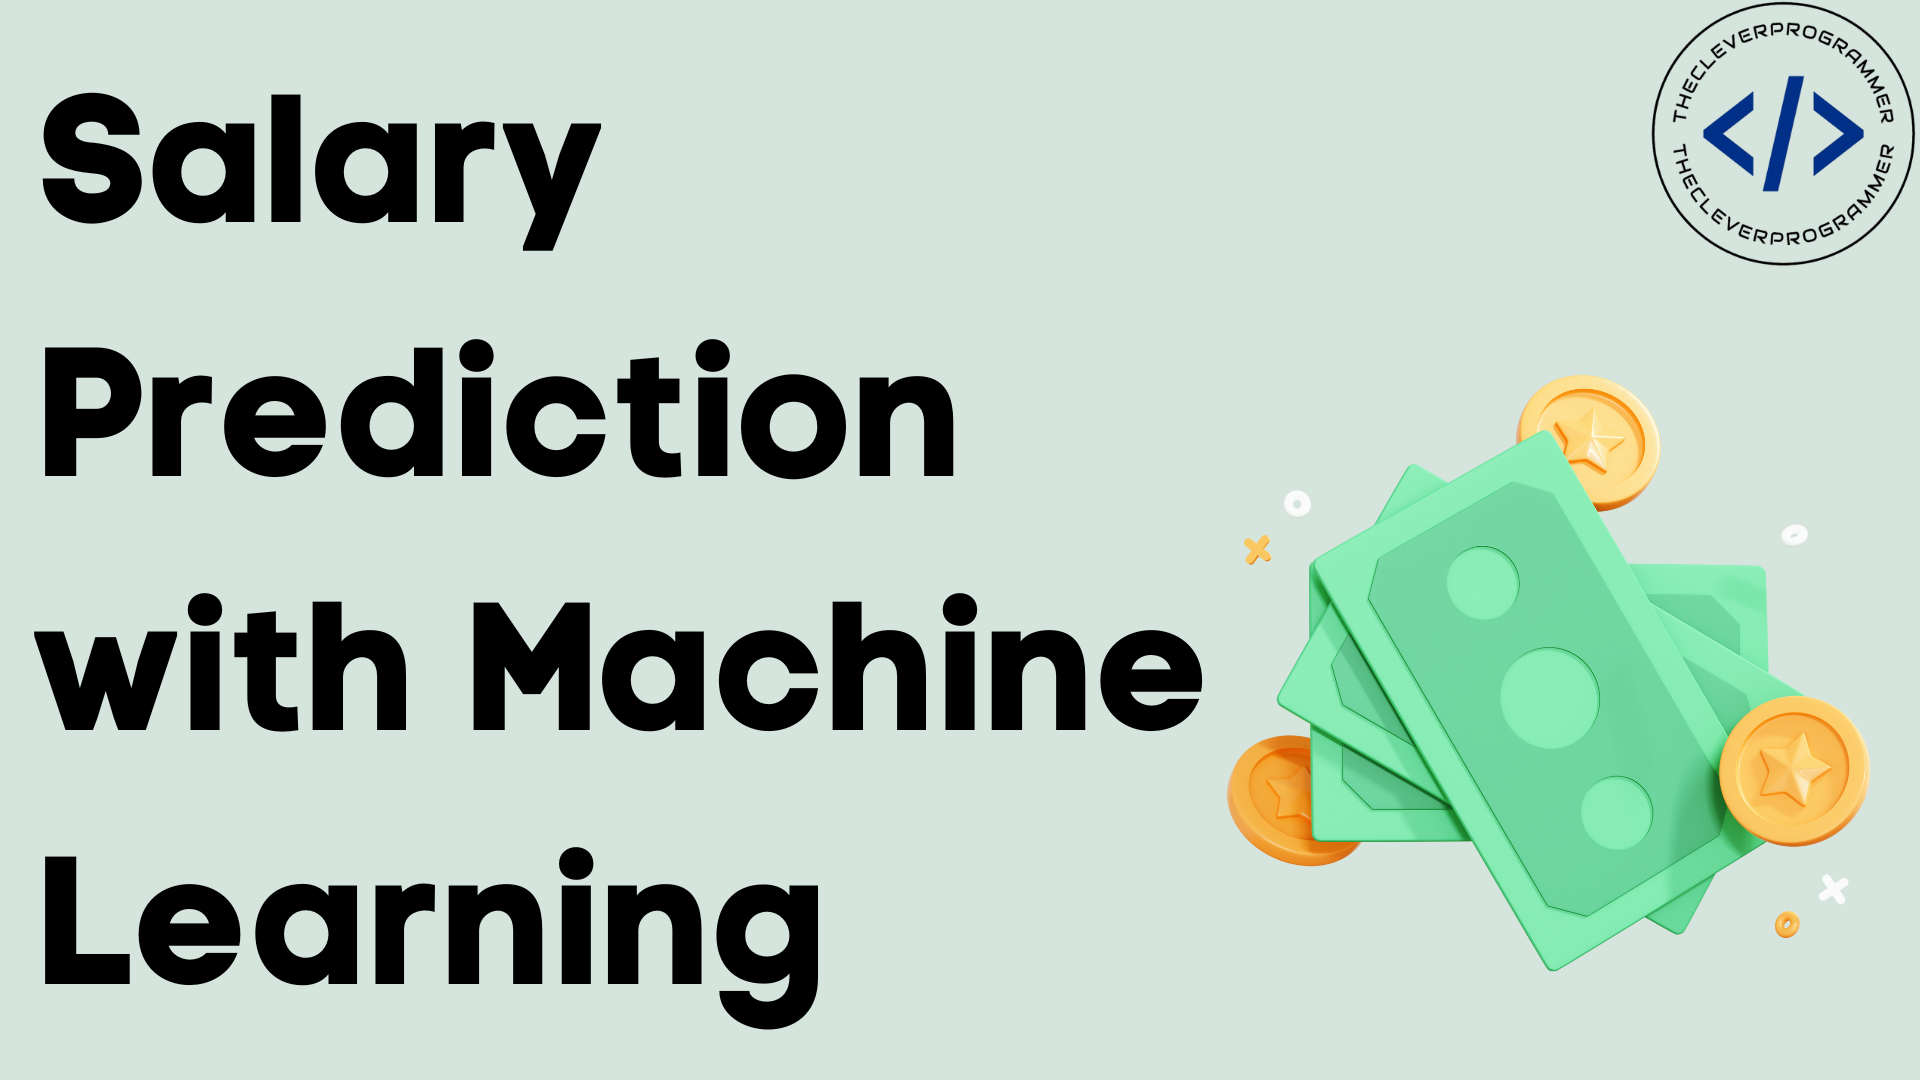

## **problem statement**

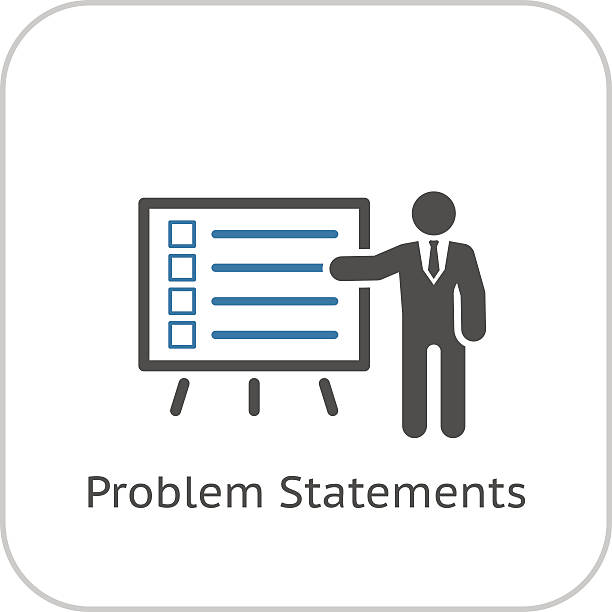

The project aims to analyze and predict salaries in USD using a dataset that includes various features such as job type,remote ratio,work year,and other categorical and numerical variables.The data is preprocessed and explored to uncover patterns,outliers,and correlations that might impact salary levels

# **IMPORT LIBRARIES**

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from scipy.stats import skew

from sklearn.feature_selection import SelectKBest, f_regression

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# **LOAD THE CSV FILE**

In [23]:
data = pd.read_csv("salaries.csv")

# **CONVERT TO A DATAFRAME**

In [24]:
df=pd.DataFrame(data)

# **STATISTICAL MEASURES**

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88584 entries, 0 to 88583
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           88584 non-null  int64 
 1   experience_level    88584 non-null  object
 2   employment_type     88584 non-null  object
 3   job_title           88584 non-null  object
 4   salary              88584 non-null  int64 
 5   salary_currency     88584 non-null  object
 6   salary_in_usd       88584 non-null  int64 
 7   employee_residence  88584 non-null  object
 8   remote_ratio        88584 non-null  int64 
 9   company_location    88584 non-null  object
 10  company_size        88584 non-null  object
dtypes: int64(4), object(7)
memory usage: 7.4+ MB


In [26]:
df.shape

(88584, 11)

In [27]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [28]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,88584.000000,8.858400e+04,88584.000000,88584.000000
mean,2024.034758,1.619323e+05,157567.798417,21.286011
std,0.620370,1.965317e+05,73531.373158,40.831018
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060000e+05,106097.250000,0.000000
50%,2024.000000,1.470000e+05,146307.000000,0.000000
75%,2024.000000,1.995000e+05,198600.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


# **HANDLING MISSING VALUES**

In [29]:
df.isnull().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


# **droping target value**

In [30]:

x=df.drop(["salary_in_usd"],axis=1)
y=df["salary_in_usd"]

In [31]:
x

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Customer Success Manager,57000,EUR,NL,50,NL,L
1,2025,SE,FT,Engineer,165000,USD,US,0,US,M
2,2025,SE,FT,Engineer,109000,USD,US,0,US,M
3,2025,SE,FT,Applied Scientist,294000,USD,US,0,US,M
4,2025,SE,FT,Applied Scientist,137600,USD,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...
88579,2020,SE,FT,Data Scientist,412000,USD,US,100,US,L
88580,2021,MI,FT,Principal Data Scientist,151000,USD,US,100,US,L
88581,2020,EN,FT,Data Scientist,105000,USD,US,100,US,S
88582,2020,EN,CT,Business Data Analyst,100000,USD,US,100,US,L


In [32]:
y

,salary_in_usd
0,60000
1,165000
2,109000
3,294000
4,137600
...,...
88579,412000
88580,151000
88581,105000
88582,100000


# **HANDLING DUPLICATES**

In [33]:
df.duplicated().sum()

np.int64(44340)

In [34]:

df.drop_duplicates()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Customer Success Manager,57000,EUR,60000,NL,50,NL,L
1,2025,SE,FT,Engineer,165000,USD,165000,US,0,US,M
2,2025,SE,FT,Engineer,109000,USD,109000,US,0,US,M
3,2025,SE,FT,Applied Scientist,294000,USD,294000,US,0,US,M
4,2025,SE,FT,Applied Scientist,137600,USD,137600,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
88579,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
88580,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
88581,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
88582,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


# **ONEHOTENCODER**

In [35]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse_output=False)
categorical_columns=df.select_dtypes(include=['object']).columns.tolist()
one_hot_encoder=encoder.fit_transform(df[categorical_columns])
one_hot_encoded_df=pd.DataFrame(one_hot_encoder,columns=encoder.get_feature_names_out(categorical_columns))
df_sklearn_encoded=pd.concat([df.drop(categorical_columns,axis=1),one_hot_encoded_df],axis=1)
print(f"one_hot_encoded Data using scikit_learn:\n{df_sklearn_encoded}")
df_a=df_sklearn_encoded
print(df_a)

one_hot_encoded Data using scikit_learn:
       work_year   salary  salary_in_usd  remote_ratio  experience_level_EN  \
0           2025    57000          60000            50                  0.0   
1           2025   165000         165000             0                  0.0   
2           2025   109000         109000             0                  0.0   
3           2025   294000         294000             0                  0.0   
4           2025   137600         137600             0                  0.0   
...          ...      ...            ...           ...                  ...   
88579       2020   412000         412000           100                  0.0   
88580       2021   151000         151000           100                  0.0   
88581       2020   105000         105000           100                  1.0   
88582       2020   100000         100000           100                  1.0   
88583       2021  7000000          94665            50                  0.0   

       exp

# **OUTLIERS**

<Axes: >

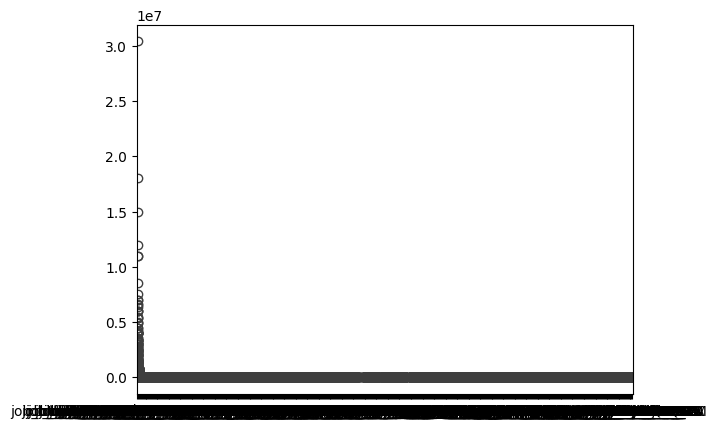

In [36]:
sns.boxplot(df_a)

In [37]:
 num_columns=df.select_dtypes(include="number")
 num_columns.head()

,work_year,salary,salary_in_usd,remote_ratio
0,2025,57000,60000,50
1,2025,165000,165000,0
2,2025,109000,109000,0
3,2025,294000,294000,0
4,2025,137600,137600,0


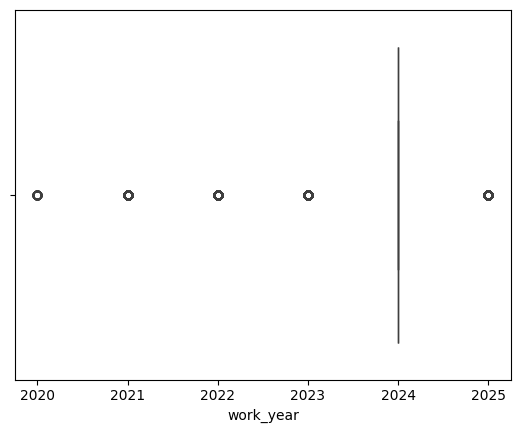

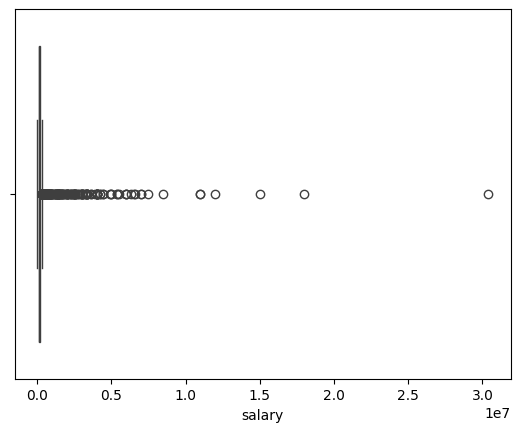

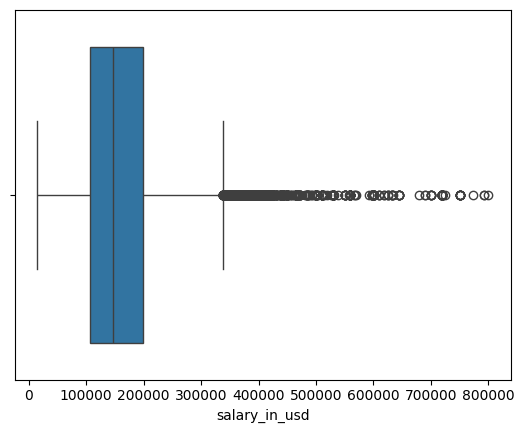

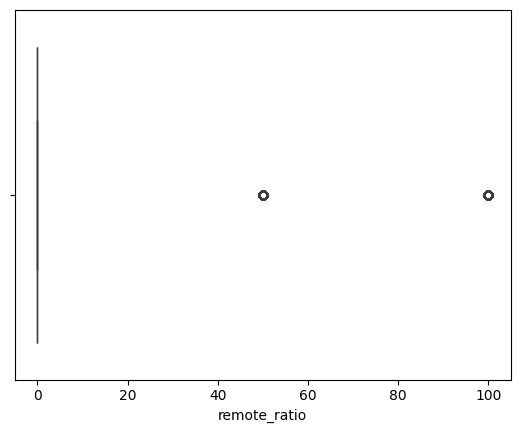

In [38]:
for columns in num_columns.columns:
  sns.boxplot(data=num_columns,x=columns)
  plt.show()


# **handling outliers:**

In [60]:
def handling_outliers(df):
  for col in df.select_dtypes(include='number').columns:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    iqr=Q3-Q1
    lower_bound=Q1-(1.5*iqr)
    upper_bound=Q3+(1.5*iqr)
    df[col]=df[col].apply(lambda x:lower_bound if x upper_bound else x)
  return df
df=handling_outliers(df)
df.head()
sns.boxplot(df)

SyntaxError: expected 'else' after 'if' expression (<ipython-input-60-8dfb2b9771ff>, line 8)

In [ ]:
for column in num_columns:
  sns.boxplot(data=df,x=column)
  plt.show()

# *visualization:*

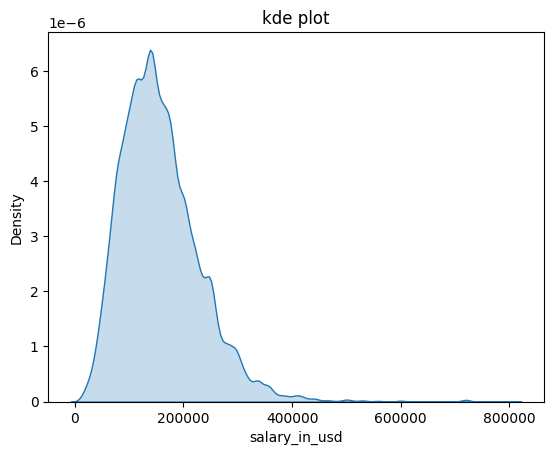

In [41]:
sns.kdeplot(x=df["salary_in_usd"],fill=True)
plt.xlabel("salary_in_usd")
plt.title("kde plot")
plt.show()

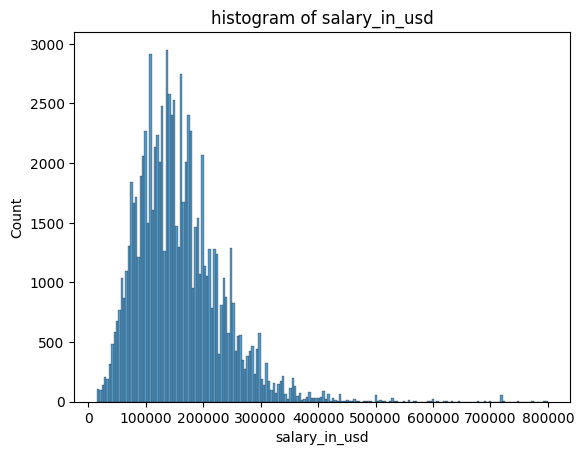

In [42]:
sns.histplot(data=df_a,x="salary_in_usd")
plt.title("histogram of salary_in_usd")
plt.xlabel("salary_in_usd")
plt.show()

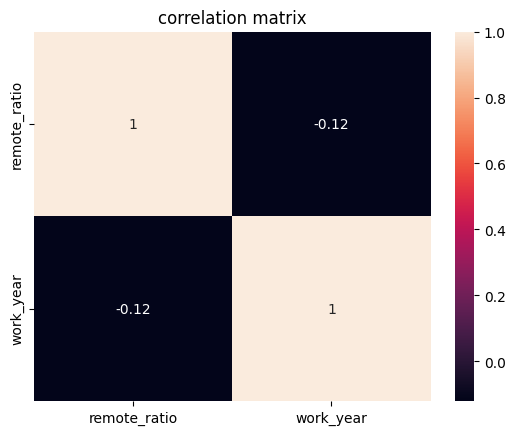

In [43]:
col=["remote_ratio","work_year"]
corr_mat=df_a[col].corr()
sns.heatmap(corr_mat,annot=True)
plt.title("correlation matrix")
plt.show()

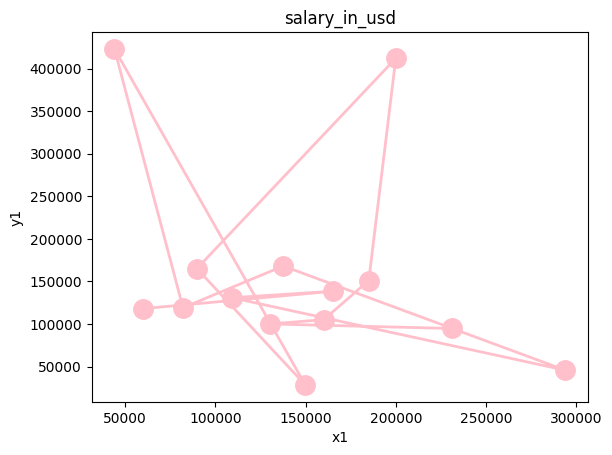

In [44]:
x1=df_a["salary_in_usd"].head(14)
y1=df_a["salary_in_usd"].tail(14)
plt.plot(x1,y1,color="pink",linewidth=2,marker="o",markersize=14,label='salary_in_usd')
plt.title("salary_in_usd")
plt.xlabel("x1")
plt.ylabel("y1")
plt.show()

# ***Skewness***:

In [45]:
cols_to_transform = ['salary_in_usd']
pt = PowerTransformer(method='yeo-johnson')
data[cols_to_transform] = pt.fit_transform(data[cols_to_transform])

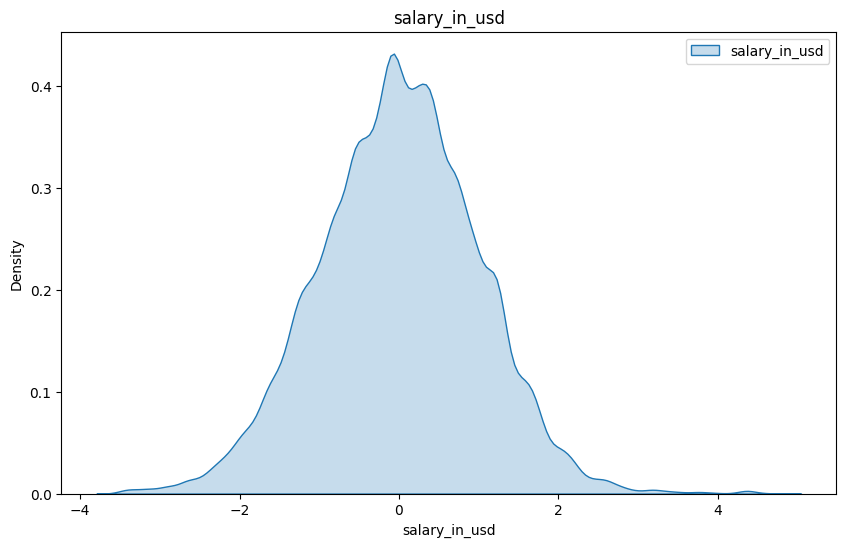

In [46]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data["salary_in_usd"], label="salary_in_usd", fill=True)
plt.legend()
plt.title("salary_in_usd")
plt.show()

In [47]:
for col in df.select_dtypes(include=['number']).columns:
    print(f"{col} Skewness: {skew(df[col]):.4f}")

work_year Skewness: -0.9538
salary Skewness: 68.5944
salary_in_usd Skewness: 1.3219
remote_ratio Skewness: 1.4030


# *Feature Selection:*

In [48]:
x=df.drop(columns=['salary_in_usd'],axis=1)
y=df['salary_in_usd']

In [49]:
x = df_a.drop(columns=['salary_in_usd'], axis=1)
y = df_a['salary_in_usd']

selecter = SelectKBest(score_func=f_regression, k=6)
x_new = selecter.fit_transform(x, y)
selected_feature = x.columns[selecter.get_support()]
feature_score = pd.DataFrame({'Feature': x.columns, 'Score': selecter.scores_}).sort_values(by='Score', ascending=False)
print(feature_score)

                                 Feature         Score
1                                 salary  11677.470613
3                    experience_level_EN   5991.136506
347                  salary_currency_USD   5896.093011
6                    experience_level_SE   5826.012637
438                employee_residence_US   5690.627542
..                                   ...           ...
145    job_title_Data Operations Manager      0.002805
264    job_title_Principal Data Engineer      0.001021
28        job_title_AI Software Engineer      0.000761
114            job_title_Data Governance      0.000695
244  job_title_Marketing Science Partner      0.000002

[538 rows x 2 columns]


In [50]:
x_selected=x[selected_feature]
x_selected.head()

,salary,experience_level_EN,experience_level_SE,salary_currency_USD,employee_residence_US,company_location_US
0,57000,0.0,0.0,0.0,0.0,0.0
1,165000,0.0,1.0,1.0,1.0,1.0
2,109000,0.0,1.0,1.0,1.0,1.0
3,294000,0.0,1.0,1.0,1.0,1.0
4,137600,0.0,1.0,1.0,1.0,1.0


# **TRAIN_TEST_SPLIT**

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x_selected,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(70867, 6)
(17717, 6)
(70867,)
(17717,)


# **SCALAR**

In [52]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_test_scaled=ss.fit_transform(x_test)
x_train_scaled=ss.fit_transform(x_train)

# **BULINDING MODEL AND EVALUTION**

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [54]:
print("\n Training Models")
models={
    'Linear Regression':LinearRegression(),
    'Random Forest':RandomForestRegressor(),
    'Decision Tree':DecisionTreeRegressor(),
    'SVR':SVR()
}


 Training Models


In [56]:
result={}
for name,model in models.items():
  print(f"Training {name} model")
  model.fit(x_train_scaled,y_train)
  y_pred=model.predict(x_test_scaled)
  result[name]={
      'MSE':mean_squared_error(y_test,y_pred),
      'MAE':mean_absolute_error(y_test,y_pred),
      'R2':r2_score(y_test,y_pred)
  }


Training Linear Regression model
Training Random Forest model
Training Decision Tree model
Training SVR model


In [57]:
print("\n Model Evalution")
for model_name,metrics in result.items():
  print(f"{model_name}:")
  for metric_name,metric_value in metrics.items():
    print(f"{metric_name}:{metric_value}")


 Model Evalution
Linear Regression:
MSE:4503678265.883719
MAE:46000.97948379074
R2:0.18457136876980818
Random Forest:
MSE:677623468.6651243
MAE:18738.8627793495
R2:0.8773106014857316
Decision Tree:
MSE:673359499.005918
MAE:18768.049461937786
R2:0.8780826288681386
SVR:
MSE:5377670090.664655
MAE:53665.831437823144
R2:0.0263278364140056


In [58]:
print("The best model is Random Forest Regressor")

The best model is Random Forest Regressor


# **USES OF THIS PROJECT**



1. Gain insights from complex data
2. Improve accuracy and efficiency in predictive tasks
3. It solves real-world problem
4. Automate decision-making processes




# **project overview**



1. Data collection and understanding
2. Data processing to handling missing values,encode categories,normalize features
3. EDA to uncover patterns and trends
4. Model Building using algorithms like Desicion Tree,SVM
5. Model Evaluation using accuracy,presicion,recall and confusion matrix
6. Result Interpretation to identify the best-performing model

